Probability less than 50%, odds is (0:1),and reversed p is larger than 50%, odds is (1:∞)

In [1]:
import numpy as np
import pandas as pd

In [2]:
p = 0.49  #probability of winning
win_odds = p/(1-p)

In [3]:
win_odds

0.9607843137254901

In [4]:
p = 0.49
for i in  range(100):
    p = p - 0.004
    win_odds = p/(1-p)
    q = 1-p
    lose_odds = q/(1-q)
    print(f'Odds of winning will be {win_odds} and odds of losing will be {lose_odds}')

Odds of winning will be 0.9455252918287937 and odds of losing will be 1.0576131687242798
Odds of winning will be 0.9305019305019304 and odds of losing will be 1.074688796680498
Odds of winning will be 0.9157088122605364 and odds of losing will be 1.092050209205021
Odds of winning will be 0.9011406844106463 and odds of losing will be 1.109704641350211
Odds of winning will be 0.8867924528301886 and odds of losing will be 1.1276595744680853
Odds of winning will be 0.8726591760299625 and odds of losing will be 1.145922746781116
Odds of winning will be 0.8587360594795538 and odds of losing will be 1.1645021645021647
Odds of winning will be 0.8450184501845017 and odds of losing will be 1.183406113537118
Odds of winning will be 0.8315018315018313 and odds of losing will be 1.2026431718061676
Odds of winning will be 0.818181818181818 and odds of losing will be 1.2222222222222225
Odds of winning will be 0.8050541516245486 and odds of losing will be 1.2421524663677133
Odds of winning will be 0.7

In [5]:
p = 0.49
for i in  range(100):
    p = p - 0.004
    win_odds = p/(1-p)
    win_logit = np.log(win_odds)
    q = 1-p
    lose_odds = q/(1-q)
    lose_logit = np.log(lose_odds)
    print(f'Logit of winning will be {win_logit} and logit of losing will be {lose_logit}')

Logit of winning will be -0.05601464155467137 and logit of losing will be 0.056014641554671306
Logit of winning will be -0.07203112820888284 and logit of losing will be 0.07203112820888292
Logit of winning will be -0.0880568553911828 and logit of losing will be 0.08805685539118287
Logit of winning will be -0.10409389104263345 and logit of losing will be 0.10409389104263336
Logit of winning will be -0.12014431184206334 and logit of losing will be 0.12014431184206341
Logit of winning will be -0.13621020483454907 and logit of losing will be 0.13621020483454901
Logit of winning will be -0.1522936690800457 and logit of losing will be 0.15229366908004574
Logit of winning will be -0.16839681732546138 and logit of losing will be 0.1683968173254614
Logit of winning will be -0.18452177770355727 and logit of losing will be 0.18452177770355727
Logit of winning will be -0.20067069546215138 and logit of losing will be 0.2006706954621514
Logit of winning will be -0.21684573472721988 and logit of losi

In [6]:
data = pd.read_csv('Survey Form Responses-Final.csv')

In [7]:
data.head()

,RID,Gender,Age,Education,Profession,Monthly_Income,Bank_Account,Which_bank,Status_of_Usage,Attributes_Quality,...,ATM_Frequency,ATM_Location_Satisfaction,ATM_Card_Block_Problem,ATM_Out_of_Cash_Problem,ATM_Non_Printing_Problem,ATM_Out_of_Order_Problem,ATM_Long_Waiting_Time_Problem,ATM_Reduction_of_Balance_Problem,Security_ATMs,Intent_to_Return
0,1,male,20-25,post graduate,student,2,yes,SBI,1-5 years,2,...,3,2,2,1,1,1,1,2,4,0
1,2,Female,20-25,post graduate,student,2,yes,BOB,5-10 years,2,...,3,4,3,1,1,1,1,2,3,0
2,3,male,20-25,post graduate,student,0,yes,SBI,1-5 years,2,...,2,3,2,1,1,1,2,2,2,1
3,4,male,20-25,post graduate,student,0,yes,BOB,1-5 years,2,...,1,1,3,3,3,3,3,3,2,0
4,5,male,20-25,graduate,student,2,yes,SBI,5-10 years,4,...,2,3,2,2,2,1,2,2,3,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   RID                               100 non-null    int64 
 1   Gender                            100 non-null    object
 2   Age                               100 non-null    object
 3   Education                         100 non-null    object
 4   Profession                        100 non-null    object
 5   Monthly_Income                    100 non-null    int64 
 6   Bank_Account                      100 non-null    object
 7   Which_bank                        92 non-null     object
 8   Status_of_Usage                   100 non-null    object
 9   Attributes_Quality                100 non-null    int64 
 10  Favorite_Attributes_Technology    100 non-null    int64 
 11  Favorite_Attributes_Trust         100 non-null    int64 
 12  Favorite_Attributes_Loc

In [9]:
features = ['ATM_Location_Satisfaction','ATM_Out_of_Cash_Problem','Security_ATMs']
target = 'Intent_to_Return'
X = data.loc[:,features].values
y = data.loc[:,target].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_reg = LogisticRegression()

In [14]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = log_reg.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[9, 5],
       [6, 5]], dtype=int64)

In [20]:
import matplotlib.pyplot as plt

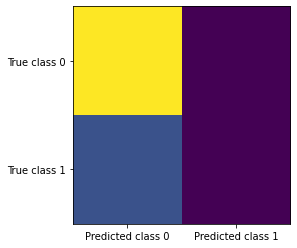

In [21]:
plt.imshow(cm)
plt.xticks([0,1],['Predicted class 0', 'Predicted class 1'])
plt.yticks([0,1],['True class 0', 'True class 1'])
plt.show()

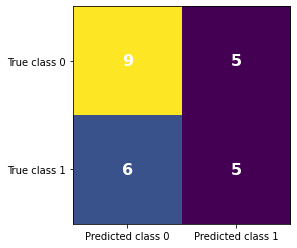

In [22]:
plt.imshow(cm)
plt.xticks([0,1],['Predicted class 0', 'Predicted class 1'])
plt.yticks([0,1],['True class 0', 'True class 1'])
plt.text(0,0, cm[0,0], ha = 'center', va = 'center', color = 'white', fontsize = 16, weight='bold')
plt.text(1,0, cm[0,1], ha = 'center', va = 'center', color = 'white', fontsize = 16, weight='bold')
plt.text(0,1, cm[1,0], ha = 'center', va = 'center', color = 'white', fontsize = 16, weight='bold')
plt.text(1,1, cm[1,1], ha = 'center', va = 'center', color = 'white', fontsize = 16, weight='bold')
plt.show()

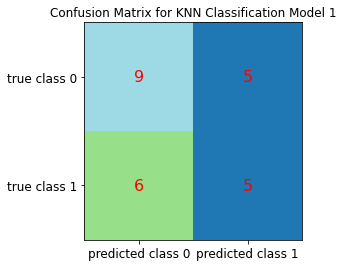

In [24]:
cmap = plt.cm.tab20  #different color
plt.imshow(cm, cmap=cmap)
plt.xticks([0,1],['predicted class 0', 'predicted class 1'], fontsize = 12) 
plt.yticks([0,1], ['true class 0', 'true class 1'], fontsize = 12 ) 
plt.text(0,0, cm[0,0], horizontalalignment='center', verticalalignment='center', color='red',fontsize = 16) 
plt.text(1,0, cm[0,1], horizontalalignment='center', verticalalignment='center', color='red',fontsize = 16) 
plt.text(0,1, cm[1,0], horizontalalignment='center', verticalalignment='center', color='red',fontsize = 16) 
plt.text(1,1, cm[1,1], horizontalalignment='center', verticalalignment='center', color='red',fontsize = 16) 
plt.title('Confusion Matrix for KNN Classification Model 1') 
plt.show() 

In [25]:
log_reg.coef_

array([[0.33724632, 0.04608493, 1.01533023]])

In [26]:
log_reg.intercept_

array([-3.48156365])

In [27]:
log_reg.decision_function(X_test)

array([-0.68424069, -2.08290217, -0.39307929, -1.07116319, -0.68424069,
       -1.69957092,  1.63758118, -0.39307929, -2.03681724, -2.08290217,
        0.66833587,  0.03992815,  0.33108955, -1.40840952, -0.34699436,
        0.33108955, -0.34699436,  0.62225094,  0.28500462, -1.74565584,
        0.28500462, -1.07116319, -0.97540208,  0.62225094,  0.28500462])